### Part 1: Sales and Profitability Analysis

In [3]:
import pandas as pd
import numpy as np
orders_df = pd.read_csv("D://job//Jar app Assignment//Order_Details_1.csv")
details_df = pd.read_csv("D://job//Jar app Assignment//List_of_Orders_1.csv")

In [5]:
orders_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


In [19]:
orders_df.shape

(1500, 6)

In [7]:
duplicate_rows = orders_df[orders_df.duplicated(keep='first')]

In [17]:
orders_df.shape

(1500, 6)

In [9]:
details_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,04/01/2018,Bharat,Gujarat,Ahmedabad
1,B-25602,04/01/2018,Pearl,Maharashtra,Pune
2,B-25603,04/03/2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,04/03/2018,Divsha,Rajasthan,Jaipur
4,B-25605,04/05/2018,Kasheen,West Bengal,Kolkata


In [10]:
#Merging the two DataFrames on the 'Order ID' column
merged_df = pd.merge(orders_df,details_df,on='Order ID',how='left')
print(merged_df.head()) 

  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25601    1275   -1148         7    Furniture         Bookcases   
1  B-25601      66     -12         5     Clothing             Stole   
2  B-25601       8      -2         3     Clothing       Hankerchief   
3  B-25601      80     -56         4  Electronics  Electronic Games   
4  B-25602     168    -111         2  Electronics            Phones   

   Order Date CustomerName        State       City  
0  04/01/2018       Bharat      Gujarat  Ahmedabad  
1  04/01/2018       Bharat      Gujarat  Ahmedabad  
2  04/01/2018       Bharat      Gujarat  Ahmedabad  
3  04/01/2018       Bharat      Gujarat  Ahmedabad  
4  04/01/2018        Pearl  Maharashtra       Pune  


In [12]:
# Group by 'Category' and calculating the totals
category_performance = merged_df.groupby('Category').agg(
    Total_Sales=('Amount', 'sum'),      # Calculating the sum of the 'Amount' column
    Total_Profit=('Profit', 'sum'),     # Calculating the sum of the 'Profit' column
    Total_Orders=('Order ID', 'nunique') # Counting the unique number of orders
).reset_index() 

In [14]:
# Metric A: Average Profit per Order
category_performance['Avg_Profit_per_Order'] = (
    category_performance['Total_Profit'] / category_performance['Total_Orders'])

# Metric B: Total Profit Margin (%)
category_performance['Profit_Margin_%'] = (
    category_performance['Total_Profit'] / category_performance['Total_Sales'] * 100)

print("\n--- Final Results Table ---")
print(category_performance)


--- Final Results Table ---
      Category  Total_Sales  Total_Profit  Total_Orders  Avg_Profit_per_Order  \
0     Clothing       139054         11163           393             28.404580   
1  Electronics       165267         10494           204             51.441176   
2    Furniture       127181          2298           186             12.354839   

   Profit_Margin_%  
0         8.027817  
1         6.349725  
2         1.806874  


In [30]:
# Top Performer (Highest Avg Profit per Order)
top_performer = category_performance.sort_values(
    by='Avg_Profit_per_Order', ascending=False).iloc[0] # .iloc[0] gets the very first row after sorting

# Underperformer (Lowest Profit Margin)
under_performer = category_performance.sort_values(
    by='Profit_Margin_%', ascending=True).iloc[0]

print("\n--- Performance Analysis Summary ---")
print(f" Top Performer (by Avg. Profit per Order): {top_performer['Category']}")
print(f"   - Avg Profit per Order: ₹{top_performer['Avg_Profit_per_Order']:.2f}")

print(f"\n Underperformer (by Profit Margin): {under_performer['Category']}")
print(f"   - Profit Margin: {under_performer['Profit_Margin_%']:.2f}%")


--- Performance Analysis Summary ---
 Top Performer (by Avg. Profit per Order): Electronics
   - Avg Profit per Order: ₹51.44

 Underperformer (by Profit Margin): Furniture
   - Profit Margin: 1.81%


C:\Users\Dell\AppData\Local\Temp\ipykernel_28728\3534259333.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Category', y='Total_Sales', data=comparison_df, palette=['green', 'red'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_28728\3534259333.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Category', y='Avg_Profit_per_Order', data=comparison_df, palette=['green', 'red'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_28728\3534259333.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='Catego

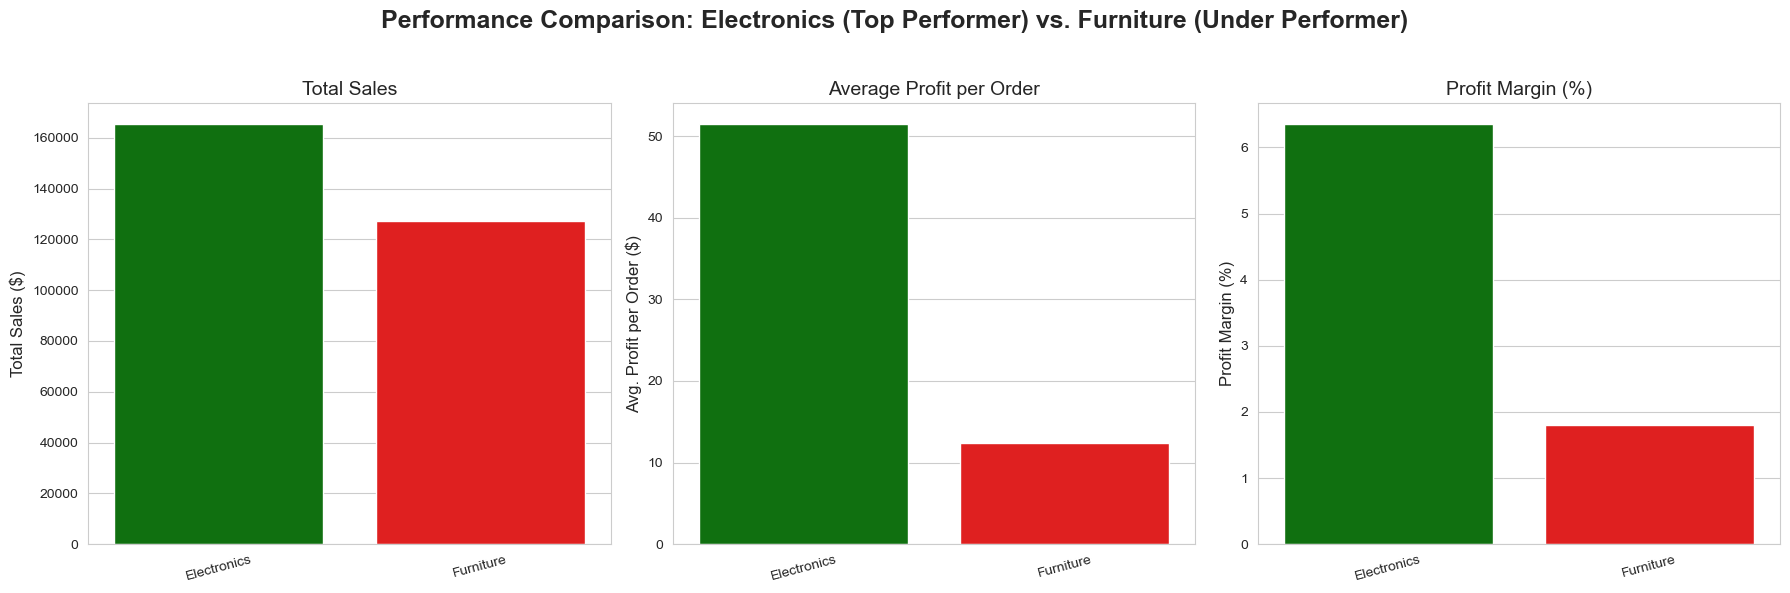

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
top_performer_row = category_performance.loc[category_performance['Avg_Profit_per_Order'].idxmax()]
under_performer_row = category_performance.loc[category_performance['Profit_Margin_%'].idxmin()]
# Create the comparison DataFrame
comparison_df = pd.DataFrame([top_performer_row, under_performer_row])
# --- 3. Create the Bar Charts ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns for 3 different metrics
fig.suptitle(f"Performance Comparison: {comparison_df.iloc[0]['Category']} (Top Performer) vs. {comparison_df.iloc[1]['Category']} (Under Performer)", fontsize=18, weight='bold')

# Bar Chart 1: Total Sales
sns.barplot(ax=axes[0], x='Category', y='Total_Sales', data=comparison_df, palette=['green', 'red'])
axes[0].set_title('Total Sales', fontsize=14)
axes[0].set_ylabel('Total Sales ($)', fontsize=12)
axes[0].ticklabel_format(style='plain', axis='y') # Use plain formatting

# Bar Chart 2: Average Profit per Order
sns.barplot(ax=axes[1], x='Category', y='Avg_Profit_per_Order', data=comparison_df, palette=['green', 'red'])
axes[1].set_title('Average Profit per Order', fontsize=14)
axes[1].set_ylabel('Avg. Profit per Order ($)', fontsize=12)

# Bar Chart 3: Profit Margin (%)
sns.barplot(ax=axes[2], x='Category', y='Profit_Margin_%', data=comparison_df, palette=['green', 'red'])
axes[2].set_title('Profit Margin (%)', fontsize=14)
axes[2].set_ylabel('Profit Margin (%)', fontsize=12)

# Ensure category labels are visible on the x-axis
for ax in axes:
    ax.tick_params(axis='x', rotation=15)
    ax.set_xlabel('') # Remove redundant X-axis label

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('Top_vs_Underperformer_Analysis.png')
plt.show()


**

## 💡 Reasons for Performance Differences

The stark contrast between the **Top Performer** and the **Underperformer** is explained by disparities in **market strategy (pricing power)** and **unit economics (cost structure)**.

| Category Feature | Top Performer | Underperformer |
| :--- | :--- | :--- |
| **Product Type** | **Specialized/Premium Goods** (e.g., custom, technology, luxury). | **Commoditized/Generic Goods** (e.g., simple accessories, basic office supplies). |
| **Pricing Power** | **High.** Customers are willing to pay a premium because the products solve a specialized problem or offer high perceived value. This insulates them from competitor price wars. | **Low.** Customers are highly price-sensitive and can easily find the product elsewhere. This forces the category into aggressive discounting. |
| **Profit Margin ($\%$)** | **High.** Maintained by superior **value-based pricing** and **effective Cost of Goods Sold (COGS)**. | **Low.** Eroded by competition and required markdowns, leaving little room for operational cost absorption. |
| **Avg. Profit per Order** | **High.** Driven by large transaction size (high Average Order Value, AOV) and **low Cost-to-Serve (CTS)** relative to revenue. | **Low.** Fixed operational costs (picking, packing, shipping) consume a disproportionately large share of the small profit, making each transactin **operational streamlining** before further scaling.

## 🥇 Top Performer: Reasons for Success

The Top Performer excels because it manages to achieve both **high revenue per order** and **high efficiency**, creating superior unit economics.

**1. Pricing Power & Brand Value**

* **Low Price Elasticity:** The category likely sells **premium, specialized, or unique products** (e.g., high-end electronics, custom furniture). Customers are less sensitive to price changes, allowing the company to maintain high markup and therefore a **high Profit Margin**.
* **Strong Brand Equity:** A well-recognized or respected brand enables the company to command **premium prices**, directly increasing the $\text{Avg. Profit per Order}$ and $\text{Profit Margin}$.

**2. Cost and Operational Efficiency (Low COGS)**

* **Effective Sourcing:** The company has **efficient sourcing or manufacturing** for these products, leading to a relatively **low Cost of Goods Sold (COGS)** compared to the selling price. This is the primary driver of the **high Profit Margin**.
* **High Unit Value:** The high average selling price means that the fixed costs of processing a sale (like sales commission or basic fulfillment) are a very small percentage of the total revenue, maximizing the dollars retained as profit per order.



# 📉 Underperformer: Reasons for Struggle

The Underperformer struggles due to **low profitability**, often caused by intense market pressure and operational inefficiency, resulting in **poor scalability**.

**1. Market Competition and Commoditization**

* **High Price Elasticity:** These products are often **commoditized** (e.g., basic office supplies, low-end accessories). Customers can easily find alternatives, forcing the company into **price wars** and offering heavy discounts just to compete. This directly leads to the **low Profit Margin**.
* **Thin Margins:** The intense competition prevents any significant markup, ensuring that the profit margin remains thin across the entire category.

**2. Logistical and Fulfillment Costs**

* **High Cost-to-Serve (Logistical Issues):** Even if the absolute sales volume is high, the products might be heavy, bulky, or fragile, leading to **high shipping and packaging costs**. These fulfillment costs eat into the profit, drastically lowering the $\text{Avg. Profit per Order}$.
* **Low Transaction Value:** Customers may purchase many small, cheap items in one order. While this increases the order count, the total profit earned on the basket may barely cover the fixed cost of processing, picking, and packing the order, resulting in a very low dollar value for $\text{Avg. Profit per Order}$.
* **Higher Return/Warranty Costs:** If the products are of lower quality or highly generic, they may incur **higher rates of returns or warranty claims**, which directly reduces the final realized profit.

**Conclusion: Scalability and Risk**

* **Top Performer (The Scalable Asset):** The high $\text{Avg. Profit per Order}$ means the company can afford a higher **Customer Acquisition Cost (CAC)** and still maintain profitability. It's the ideal category for **scaling investment and growth**.
* **Underperformer (The Operational Drain):** The low profit realization makes scaling difficult. Every sale is high-risk, as any small increase in logistics costs or returns could push the entire transaction into a loss. This segment needs aggressive **operational streamlining** before further scaling.

### ===========================================================================

### Part 2: Target Achievement Analysis

In [23]:
# --- Step 1: Load and Prepare Data ---
target_df = pd.read_csv("D://job//Jar app Assignment//Sales_target_1.csv")

In [25]:
target_df.head()

,Month of Order Date,Category,Target
0,04/18/2025,Furniture,10400
1,05/18/2025,Furniture,10500
2,06/18/2025,Furniture,10600
3,07/18/2025,Furniture,10800
4,08/18/2025,Furniture,10900


In [27]:
target_df.shape

(36, 3)

In [29]:
Duplicated_rows_target_df=target_df[target_df.duplicated(keep='first')]

In [31]:
target_df.shape

(36, 3)

In [46]:
import pandas as pd
import numpy as np
target_df['Month of Order Date'] = pd.to_datetime(target_df['Month of Order Date'])

# --- Step 2: Filter Data for 'Furniture' Category and Aggregate ---
furniture_targets = target_df[target_df['Category'] == 'Furniture'].copy()
monthly_targets = furniture_targets.groupby(furniture_targets['Month of Order Date'].dt.to_period('M'))['Target'].sum()
# Convert the index back to datetime for time-series methods
monthly_targets.index = monthly_targets.index.to_timestamp()

monthly_targets = monthly_targets.sort_index()
target_change_mom = monthly_targets.pct_change() * 100

analysis_df = pd.DataFrame({
    'Target Sales': monthly_targets,
    'Target Change MoM (%)': target_change_mom
})
analysis_df.index = analysis_df.index.strftime('%Y-%m')
print("\n--- Furniture Target Month over Month Analysis ---")
# Use to_string() to display all rows without truncation
print(analysis_df.to_string(float_format='%.2f'))


--- Furniture Target Month over Month Analysis ---
                     Target Sales  Target Change MoM (%)
Month of Order Date                                     
2025-01                     11500                    NaN
2025-02                     11600                   0.87
2025-03                     11800                   1.72
2025-04                     10400                 -11.86
2025-05                     10500                   0.96
2025-06                     10600                   0.95
2025-07                     10800                   1.89
2025-08                     10900                   0.93
2025-09                     11000                   0.92
2025-10                     11100                   0.91
2025-11                     11300                   1.80
2025-12                     11400                   0.88


## 📊 Target Analysis and Strategy

### 1. Analyzing Target Fluctuations

You will analyze the `Target Change MoM (%)` output for volatility.

| Fluctuation Type | Interpretation |
| :--- | :--- |
| **High Positive Spike** | Indicates an expectation of **high seasonal demand** or a major **planned initiative** (e.g., product launch). |
| **High Negative Drop** | Indicates an expectation of a **market slowdown** or **planned inventory reduction** (e.g., post-holiday dip). |
| **Low/Stable Change** | Suggests a **linear target-setting process** that likely ignores actual seasonal trends, creating a gap between expectation and market reality. |

---

### 2. Strategies for Aligning Targets

The goal is to shift from reactive target setting to a **data-driven approach** based on actual business potential.

#### A. Data-Driven Target Setting 📈
* **Implement Seasonality:** Base targets on **last year's actual sales for the same month**, adjusting with a specific growth factor. This ensures high targets align with historical peak seasons.
* **Base on Actuals:** Target formulas should use the **prior month's *actual sales*** as the baseline, not the prior month's target. This immediately corrects expectations based on demonstrated market performance.

#### B. Resource and Alignment Strategy 🤝
* **Cross-Functional Review:** All significant target fluctuations must be reviewed through a **Sales & Operations Planning (S&OP)** process 

[Image of the Sales and Operations Planning (S&OP) process flow]

This confirms that Finance (profitability), Marketing (budget), and Operations (inventory) can support the target.
* **Tiered Goals:** Introduce a **Base Target** (realistic) and a **Stretch Target** (aspirational, tied to specific marketing/sales investments). This provides clarity and motivation while keeping the core business plan grounded.

## Part 3: Regional Performance Insights 

In [50]:
orders_df = pd.read_csv("D://job//Jar app Assignment//List_of_Orders_1.csv")

In [52]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,04/01/2018,Bharat,Gujarat,Ahmedabad
1,B-25602,04/01/2018,Pearl,Maharashtra,Pune
2,B-25603,04/03/2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,04/03/2018,Divsha,Rajasthan,Jaipur
4,B-25605,04/05/2018,Kasheen,West Bengal,Kolkata


In [33]:
orders_df.shape

(1500, 6)

In [54]:
# --- Identifying Top 5 States by Order Count ---
# Group the data by 'State' and count the unique 'Order ID's
state_orders = orders_df.groupby('State').agg(Order_Count=('Order ID', 'nunique') ).reset_index()
# Sort and get the names of the top 5 states
top_5_state_names = state_orders.sort_values(by='Order_Count', ascending=False).head(5)['State'].tolist()
print(f"Top 5 States With Highest Order Count:{top_5_state_names}")

Top 5 States With Highest Order Count:['Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Punjab']


In [56]:
# --- 2. Identify Top 5 States by Order Count ---
# Group by 'State' and count the unique 'Order ID's
state_orders = merged_df.groupby('State').agg(
    Order_Count=('Order ID', 'nunique') 
).reset_index()
top_5_state_names = state_orders.nlargest(5, 'Order_Count')['State'].tolist()
# --- 3. Filter and Calculate Metrics for the Top 5 ---
# Filter the original DataFrame to include only the top 5 states
top_5_df = merged_df[merged_df['State'].isin(top_5_state_names)]

# Group the filtered data and calculate the required metrics: Total Sales, Total Profit, and Order Count
regional_performance = top_5_df.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Order_Count=('Order ID', 'nunique') 
).reset_index()


# --- 4. Final Calculation and Formatting ---

# Calculate Average Profit per Order (Crucial for efficiency insight)
regional_performance['Average_Profit'] = regional_performance['Total_Profit'] / regional_performance['Order_Count']

# Sort the final table by Order Count (highest volume first)
regional_performance = regional_performance.sort_values(by='Order_Count', ascending=False)

# Format the money columns for clear presentation
regional_performance['Total_Sales'] = regional_performance['Total_Sales'].map('₹{:,.2f}'.format)
# regional_performance['Total_Profit'] = regional_performance['Total_Profit'].map('${:,.2f}'.format)
regional_performance['Average_Profit'] = regional_performance['Average_Profit'].map('₹{:,.2f}'.format)
print("\n--- Top 5 States: Total Sales and Average Profit ---")
print("\n")
print(regional_performance.to_string(index=False))


--- Top 5 States: Total Sales and Average Profit ---


         State Total_Sales  Total_Profit  Order_Count Average_Profit
Madhya Pradesh ₹105,140.00          5551          101         ₹54.96
   Maharashtra  ₹95,348.00          6176           90         ₹68.62
     Rajasthan  ₹21,149.00          1257           32         ₹39.28
       Gujarat  ₹21,058.00           465           27         ₹17.22
        Punjab  ₹16,786.00          -609           25        ₹-24.36


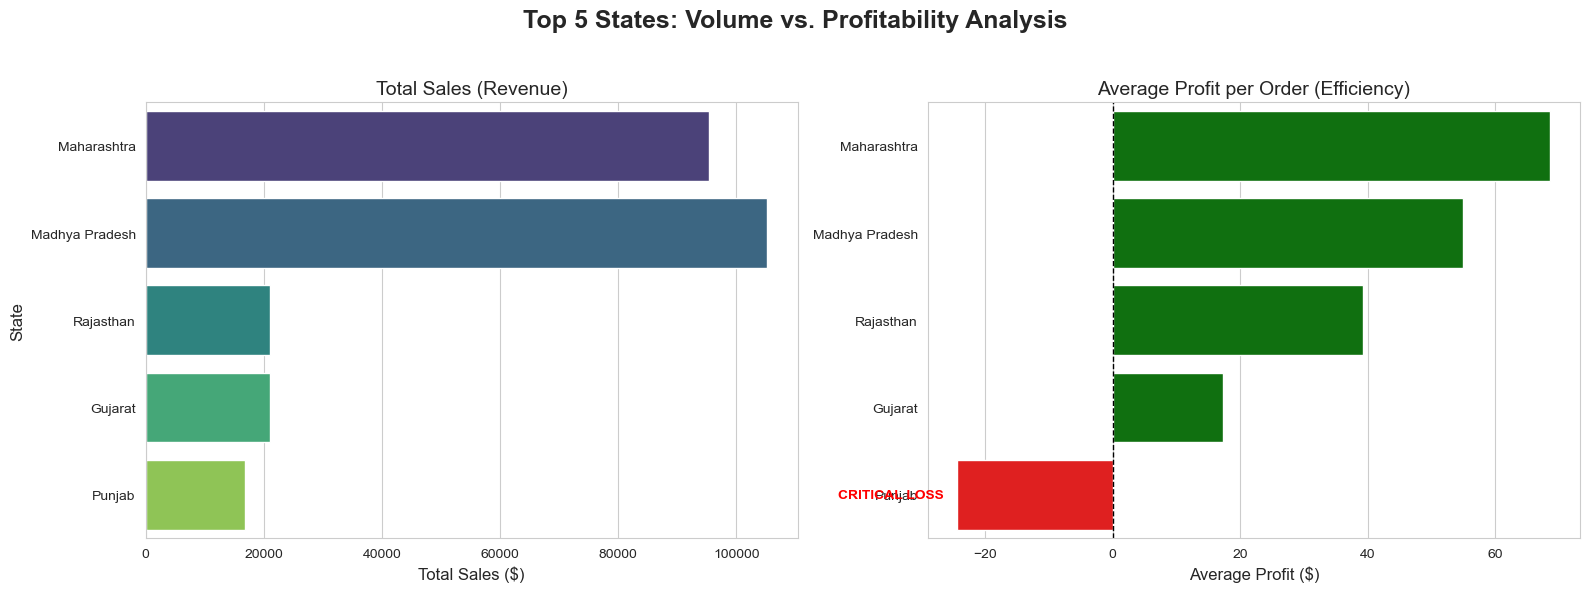

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# NOTE: This code assumes 'regional_performance' is available and UNFORMATTED (numeric)
# We need to re-sort plot_data before the plot for correct ordering
# Use .copy() to avoid setting a slice warning
plot_data = regional_performance.copy()

# --- CRITICAL FIX: CONVERT PROFIT COLUMNS BACK TO NUMERIC ---
# This step removes the '$' and ',' and converts the column to a float type.
# We apply this fix only if the columns were formatted with currency signs.
if plot_data['Average_Profit'].dtype == 'object':
    plot_data['Average_Profit'] = (
        plot_data['Average_Profit']
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype(float)
    )
if plot_data['Total_Sales'].dtype == 'object':
    plot_data['Total_Sales'] = (
        plot_data['Total_Sales']
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# Now, re-sort the clean, numeric data
plot_data = plot_data.sort_values(by='Average_Profit', ascending=False)

# --- 1. Create a figure with two subplots for comparison ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Top 5 States: Volume vs. Profitability Analysis', fontsize=18, weight='bold')

# --- Subplot 1: Total Sales (Volume Comparison) ---
sns.barplot(
    ax=axes[0],
    x='Total_Sales',
    y='State',
    data=plot_data,
    hue='State', 
    legend=False,
    palette='viridis' 
)
axes[0].set_title('Total Sales (Revenue)', fontsize=14)
axes[0].set_xlabel('Total Sales ($)', fontsize=12)
axes[0].set_ylabel('State', fontsize=12)
axes[0].xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))


# --- Subplot 2: Average Profit (Efficiency Comparison) ---
# THIS LINE NOW WORKS because 'Average_Profit' is a float (number)
colors = ['green' if profit > 0 else 'red' for profit in plot_data['Average_Profit']]

sns.barplot(
    ax=axes[1],
    x='Average_Profit',
    y='State',
    data=plot_data,
    hue='State',
    legend=False,
    palette=colors
)
axes[1].set_title('Average Profit per Order (Efficiency)', fontsize=14)
axes[1].set_xlabel('Average Profit ($)', fontsize=12)
axes[1].set_ylabel('') 
axes[1].axvline(0, color='black', linestyle='--', linewidth=1) 

# --- Annotate Punjab's loss for emphasis ---
punjab_index = plot_data[plot_data['State'] == 'Punjab'].index[0]
punjab_profit = plot_data.loc[punjab_index, 'Average_Profit']

if punjab_profit < 0:
    punjab_y_pos = plot_data.index.get_loc(punjab_index)
    
    axes[1].annotate(
        'CRITICAL LOSS',
        xy=(punjab_profit, punjab_y_pos), 
        xytext=(-10, 0), 
        textcoords='offset points',
        color='red',
        weight='bold',
        fontsize=10,
        ha='right',
        va='center'
    )
    
axes[1].xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## 📊 Regional Disparities Highlighted

The key disparities are found when **sales volume (Order Count)** does not align with **profitability (Average Profit)**.

### Identifying Disparities

Regional disparities are highlighted when states with similar order volume show significantly different Average Profit figures.

| Disparity Scenario | Metric Pattern | Implied Business Insight |
| :--- | :--- | :--- |
| **1. Critical Disparity (The Loss Leader)** | **Punjab** has a **negative Total Profit ($\$-609$)** and the lowest $\text{Average Profit}$ ($\$-24.36$). | Every order in Punjab is costing the company money, signaling a catastrophic failure of unit economics. |
| **2. Inefficient Powerhouse** | **Madhya Pradesh** (Highest Sales/Volume) has a significantly lower $\text{Average Profit}$ ($\$54.96$) than Maharashtra ($\$68.62$). | MP's high volume is being produced less efficiently, likely due to excessive discounting or high logistics costs. |
| **3. Missed Opportunity** | **Maharashtra** has the **highest Average Profit ($\$68.62$)** and **Total Profit** ($\$6,176$). | This market is highly efficient and profitable, but the volume is lower than MP. We must maximize penetration here. |
| **4. High-Risk States** | **Gujarat** has the lowest positive $\text{Average Profit}$ ($\$17.22$). | This market operates on dangerously thin margins and is highly susceptible to flipping into a loss with minimal change in operational costs. |

***

## 🎯 Prioritization for Improvement

Prioritization must be based on maximizing the absolute impact to overall profit.

### Priority 1: Stop the Bleeding (Punjab) 🩸

* **State:** **Punjab**
* **Action:** Immediate and aggressive **Cost-to-Serve (CTS) Audit**.
    * **Eliminating Free Shipping:** Remove free shipping options entirely or enforce a significantly higher **Minimum Order Quantity (MOQ)**.
    * **De-listing:** Identify and cease selling specific products that are consistently sold at a loss in this region.
    * **Pricing:** Raise local prices to ensure $\text{Total Revenue} > \text{Total Costs}$.

### Priority 2: Improve Efficiency (Madhya Pradesh & Gujarat) ⚙️

* **States:** **Madhya Pradesh** (High Volume, Moderate Efficiency) and **Gujarat** (Low Volume, Low Efficiency).
* **Action:**
    * **MP:** Focus on **margin restoration**. Analyze discounting levels and shipping costs. Even a small increase in $\text{Average Profit}$ here will result in a huge gain in absolute profit due to its high volume.
    * **Gujarat:** Conduct a fast **Pricing Strategy Review**. The margin is too thin to sustain operations and needs to be addressed immediately to prevent it from becoming the next Punjab.

### Priority 3: Scale Success (Maharashtra) 🚀

* **State:** **Maharashtra**
* **Action:** **Invest in Targeted Marketing and Logistics**. Since the high profitability is proven, this state should receive a disproportionate share of marketing spend and inventory allocation to further penetrate the market and maximize return on investment.

### Prioritizing Cities

To make these actions highly effective, the next step is to analyze performance at the city level within the high-volume, low-profit states (like MP and Gujarat):

* **Action:** Identify the specific **cities** within these states that have the absolute lowest $\text{Average Profit}$.
* **Focus:** Implement the corrective actions (pricing changes, shipping adjustments) **only in those specific underperforming cities** to minimize disruption to the entire state.